# Vesta Mk2 Comparison

## Comparison predicted FROS between Vesta Mk 2 models in Amicus and FireBehaviourCalcs_Australia (FBCalc)

### Executive Summary

- The current version of FireBehaviourCalcs_Australia_20211202 has an error in the formula for Vesta Mk 2 Phase II ROS. 
- Once corrected there is aceptable agreement between the rates of spread predicted by FireBehaviourCalcs_Australia_20211202 and Amicus.
- Predicted ROS from FireBehaviourCalcs_Australia_20211202 shows a slightly smaller range (smaller peaks, shallower troughs) than Amicus which is only partly explained by differences in the calculated moisture content.

Data sets compared:
 - Lach Lamond Point Forecast20211219 - 20211226
 - Kempsey AWS 20191107 - 20191113
 - Deans Gap Point Forecast 20130107 - 20130110

Parameters:
 - slope: 0
 - surface fhs: high (3, 12 t/ha)
 - near surface fhs: high (3, 3 t/ha)
 - near surface fuel h: 20 cm
 - elevated fhs: high (3, 3 t/ha)
 - elevated fuel h: 1 m
 - bark hazard score: high (3, 5 t/ha)
 - surface and near surface fuel load: 15 t/ha
 - WAF: 3
 - DF: 9

Analysis using [PyroPy](https://pypi.org/project/PyroPy/)

In [1]:
from pyropy import firebehaviour as fb
from pyropy import weatherdata as wd
import matplotlib.pyplot as plt

Set up the input dictionaries and date time formats to accomodate the different sources:
 - define aws dictionary for Kempsey
 - for Lach Lamond use `gridded_to_df()`
 - for Deans Gap use `gridded_to_df()` but set `header = 3`

In [2]:
# input into PyroPy
aws = {
    'date_time': 'Date/Time (EDT)',
    'temp': 'Temp (deg C)',
    'humidity': 'RH (%)',
    'wind_dir': 'Wind Direction',
    'wind_speed': 'Wind Speed (km/h)',
    'drought': 'DF',
}

# export compatible with FBCalc
fbcalc = {
    'date': 'Date',
    'time': 'Time',
    'temp': 'Temp (deg C)',
    'humidity': 'RH (%)',
    'wind_dir': 'Wind Direction',
    'wind_speed': 'Wind Speed (km/h)',
    'drought': 'DF',
}

#date time formats
aws_dt_format = '%Y/%m/%d %H:%M'
fbcalc_dt_format = "%d/%m/%Y %H:%M"


set the parameters for the model
Parameters:
 - slope: 0
 - surface fhs: high (3, 12 t/ha)
 - near surface fhs: high (3, 3 t/ha)
 - near surface fuel h: 20 cm
 - elevated fhs: high (3, 3 t/ha)
 - elevated fuel h: 1 m
 - bark hazard score: high (3, 5 t/ha)
 - surface and near surface fuel load: 15 t/ha
 - WAF: 3
 - DF: 9

In [55]:
params = {
    'waf': 3,
    'fuel_load': 15,
    'fhs_surf': 3,
    'fhs_n_surf': 3,
    'fuel_height_ns': 20,
    'fuel_height_u': 1
}

import the Lach Lamond weather stream then export to FBCalc and Amicus compatible formats
note: there seems to be an issue with the encoding of the degree symbol for Amicus csv files so the Amicus data should be copied and pasted rather than using the import csv function.

In [56]:
lach_lamond_weather = wd.gridded_to_df('Loch_Lamond2112.csv')
wd.df_to_weather(lach_lamond_weather, 'lach_lamond_to_fbc.csv', col_names=fbcalc, datetime_format=fbcalc_dt_format)
wd.df_to_amicus(lach_lamond_weather, 'lach_lamond_to_amicus.csv');

create the `PyroPy Incident`

In [57]:
lach_lamond = fb.Incident(lach_lamond_weather)
lach_lamond.set_params(params)
lach_lamond.run_forest_vesta2()
lach_lamond.print(head=True)


            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7    17   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7    15   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7    14   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7    17   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7    24   

   gfdi     mc_v      fM_d      fFA        fM   vesta2_r1  vesta2_p2  \
0     1  6.71723  0.807873  0.97678  0.789115  236.885403   0.999873   
1     1  6.77132  0.803111  0.97678  0.784463  189.760465   0.999264   
2     1  7.38899  0.747711  0.97678  0.730350  219.244666   0.999742   
3     2  7.33080  0.752993  0.97678  0.735509  345.580712   0.999999   
4     4  6.85550  0.795665  0.97678  0.777190  464.850960   1.000000   

     vesta2_r2  vesta2_p3    vesta2_r3  fros_vesta2  
0   744.295998   0.001693  1123.313247   744

Compare with FBCalc and Amicus prediction. 

At this stage there is no way to automate the Amicus andFBCalc predictions so you need to open Amicus and FBCalc, paste in the weather data, then build the models. The FBCalc output will be read back directly from the spreadsheet but the Amicus output needs to be saved to a cvs file.

In [58]:
# lach_lamond.compare_fbcalc('lach_lamond_fbcalc_20220112.xlsm', ['vesta2'])
lach_lamond.compare_amicus('lach_lamond_amicus_vesta2_20220602.csv', 'vesta2')

...and plot!

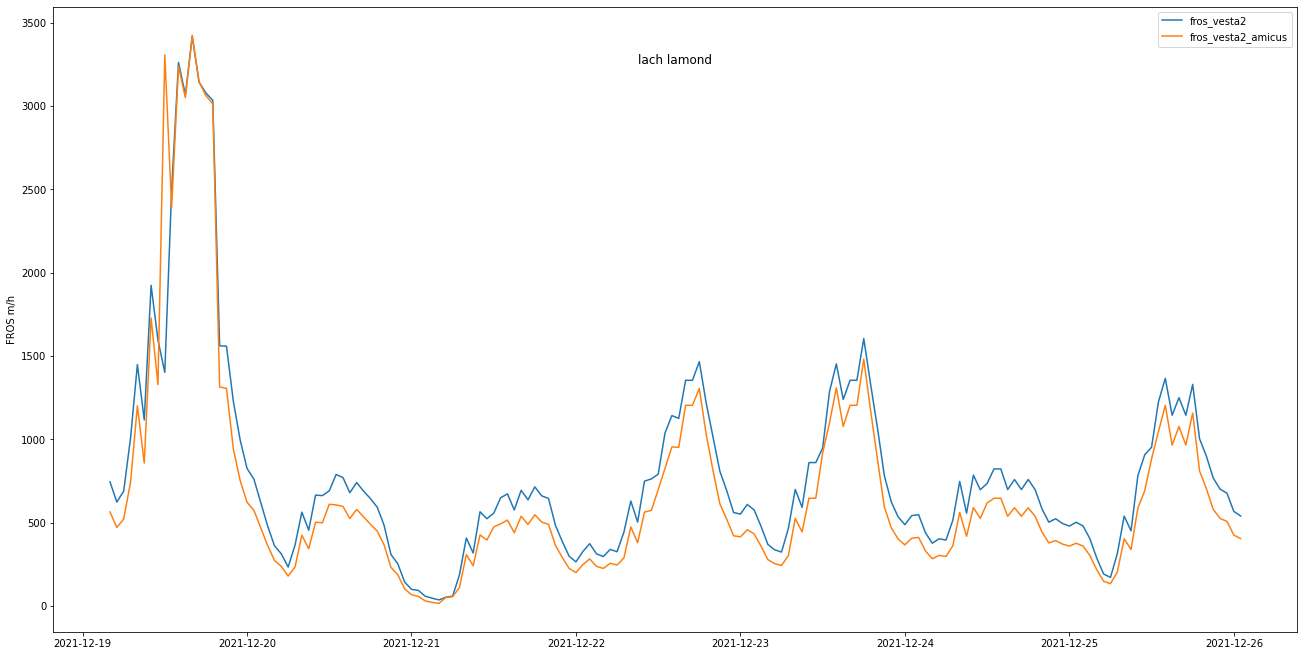

In [59]:
fig, (ax_lach_lamond) = plt.subplots(1,1, sharex=False,constrained_layout=True, figsize=(18,9))

ax_dict = {
    'lach lamond': [ax_lach_lamond, lach_lamond],
}

fields = ['fros_vesta2', 'fros_vesta2_amicus']
# fields = ['fros_vesta2_fbcalc', 'fros_vesta2_amicus']

for label, [ax, inc] in ax_dict.items():
    for f in fields:
        ax.plot(inc.df['date_time'],inc.df[f], label=f)
    ax.set_ylabel('FROS m/h')
    ax.set_title(label, y=0.9)
    ax.legend(loc='upper right')
# plt.xticks(rotation=90)
plt.show()

In [39]:
kempsey_weather = wd.weather_to_df('Kempsey_AWS_7to13Nov19.csv', col_names=aws, datetime_format=aws_dt_format)
deans_gap_weather = wd.gridded_to_df('Deans_Gap_IgnitionPoint_Fcst.csv', header=3)
wd.df_to_weather(kempsey_weather, 'kempsey_to_fbc.csv', col_names=fbcalc, datetime_format=fbcalc_dt_format)
wd.df_to_amicus(kempsey_weather, 'kempsey_to_amicus.csv')
wd.df_to_weather(deans_gap_weather, 'deans_gap_to_fbc.csv', col_names=fbcalc, datetime_format=fbcalc_dt_format)
wd.df_to_amicus(deans_gap_weather, 'deans_gap_to_amicus.csv');
kempsey_1911 = fb.Incident(kempsey_weather)
deans_gap_1301 = fb.Incident(deans_gap_weather)

In [66]:
kempsey_1911 = fb.Incident(kempsey_weather)
kempsey_1911.set_params(params)
kempsey_1911.run_forest_vesta2()
deans_gap_1301 = fb.Incident(deans_gap_weather)
deans_gap_1301.set_params(params)
deans_gap_1301.run_forest_vesta2()

In [67]:
# kempsey_1911.compare_fbcalc('kempsey_fbcalc_20220112.xlsm', ['vesta2'])
kempsey_1911.compare_amicus('kempsey_amicus_vesta2_20220602.csv', 'vesta2')
# deans_gap_1301.compare_fbcalc('deans_gap_fbcalc_20220112.xlsm', ['vesta2'])
deans_gap_1301.compare_amicus('deans_gap_amicus_vesta2_20220602.csv', 'vesta2')

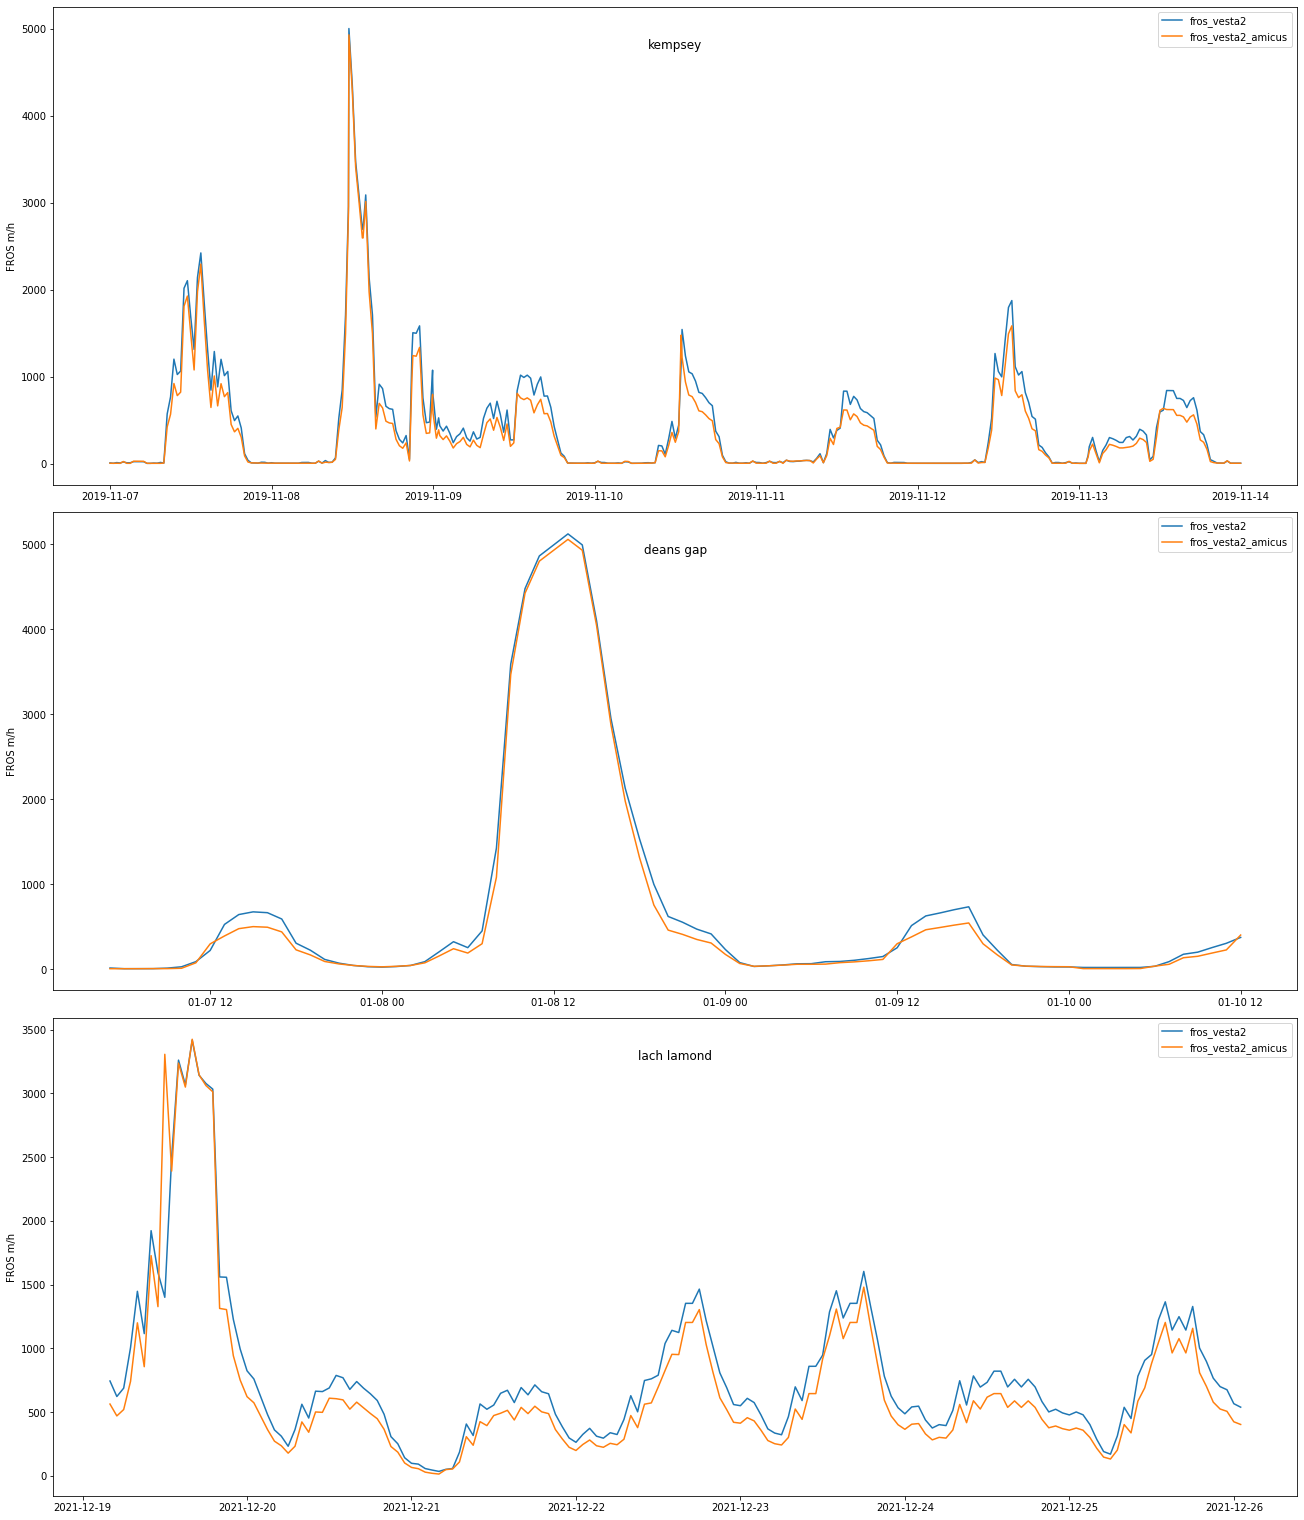

In [68]:
fig, (ax_kempsey, ax_deans_gap, ax_lach_lamond) = plt.subplots(3,1, sharex=False,constrained_layout=True, figsize=(18,21))

ax_dict = {
    'kempsey': [ax_kempsey, kempsey_1911],
    'deans gap': [ax_deans_gap, deans_gap_1301],
    'lach lamond': [ax_lach_lamond, lach_lamond],
}

fields = ['fros_vesta2', 'fros_vesta2_amicus']
# fields = ['fros_vesta2_fbcalc', 'fros_vesta2_amicus']

for label, [ax, inc] in ax_dict.items():
    for f in fields:
        ax.plot(inc.df['date_time'],inc.df[f], label=f)
    ax.set_ylabel('FROS m/h')
    ax.set_title(label, y=0.9)
    ax.legend(loc='upper right')
# plt.xticks(rotation=90)
plt.show()

The biggest discrepancies are evident in the Lach Lamond data for 20211219. A detailed look at the Lach Lamond dataset on the 19th revealed that this is partly due to differences in the way the moisture content is calculated.

note: the difference in the way the moisture content is calculated is due to whether the end points of the time ranges are included or excluded. for example the daytime moisture calcutation is for the period 12:00 to 17:00. This could be variously interpreted as:

$$ 12:00 < p < 17:00 $$
$$ 12:00 <= p < 17:00 $$
$$ 12:00 < p <= 17:00 $$
$$ 12:00 <= p <= 17:00 $$

actually look at late evening on the 20th

In [49]:
#trim the data to just the 19th
start = "20211220 18:00"
end = "20211221 06:00"
lach_lamond_20211220 = lach_lamond.copy()
lach_lamond_20211220.trim_by_datetime(start, end)

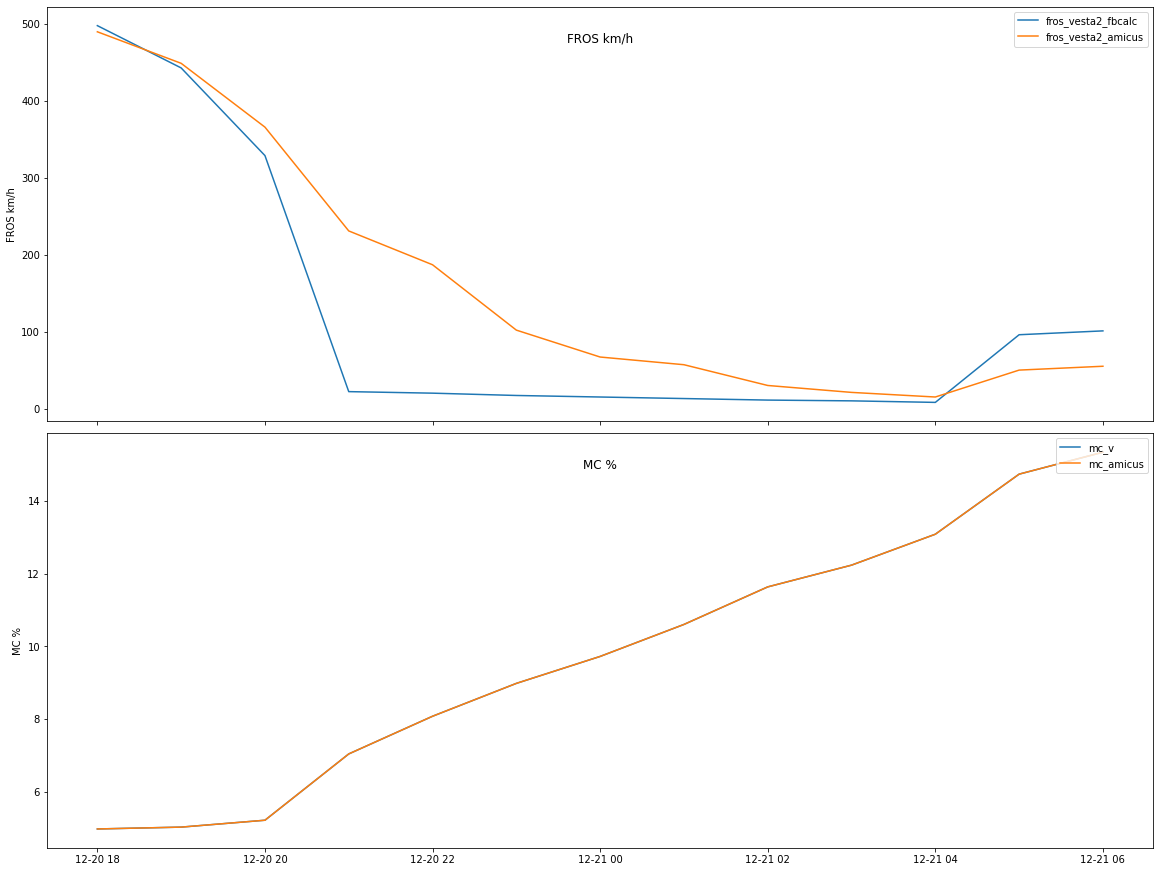

In [50]:
fig, (ax_lach_lamond, ax_mc) = plt.subplots(2,1, sharex=True,constrained_layout=True, figsize=(16,12))

ax_dict = {
    'FROS km/h': [ax_lach_lamond, ('fros_vesta2_fbcalc', 'fros_vesta2_amicus')],
    'MC %': [ax_mc, ('mc_v', 'mc_amicus')]
}

for label, [ax, fields] in ax_dict.items():
    for field in fields:
        ax.plot(lach_lamond_20211220.df['date_time'],lach_lamond_20211220.df[field], label=field)
    ax.set_ylabel(label)
    ax.set_title(label, y=0.9)
    ax.legend(loc='upper right')


plt.show()

In [54]:
lach_lamond_20211220.get_df().to_csv('temp.csv')
# lach_lamond_20211220.print()


## Conclusion
Once corrected, the Vesta MkII models of FireBehaviourCalcs_Australia_20211202 and Amicus agree with an error that is well below the level of uncertainty in any fire behaviour prediction. This version of FBCalc is therefore a suitable basis to develop protocils around the use of Vesta MkII for operational predictions.